<a href="https://colab.research.google.com/github/RayapureddiRoshini/FMML-LAB-1/blob/RayapureddiRoshini/Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

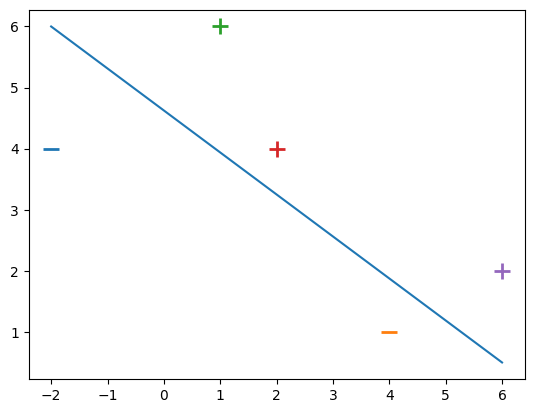

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

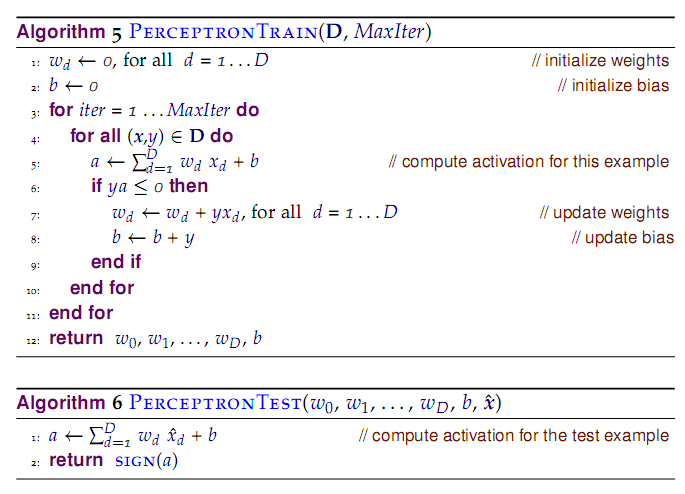

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

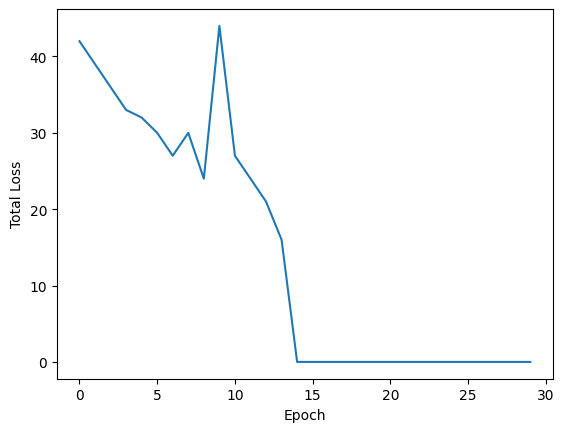

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

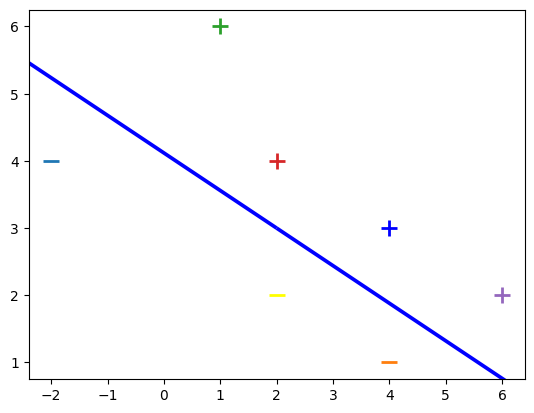

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


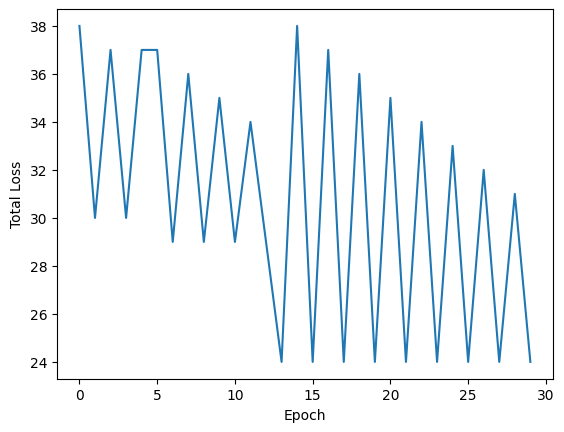

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

Question:1

This code will create a neural network model with two hidden layers, each with 10 neurons. The model will be trained on the training data and then used to make predictions on the test data. The error plot will show the number of incorrect predictions made by the model.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

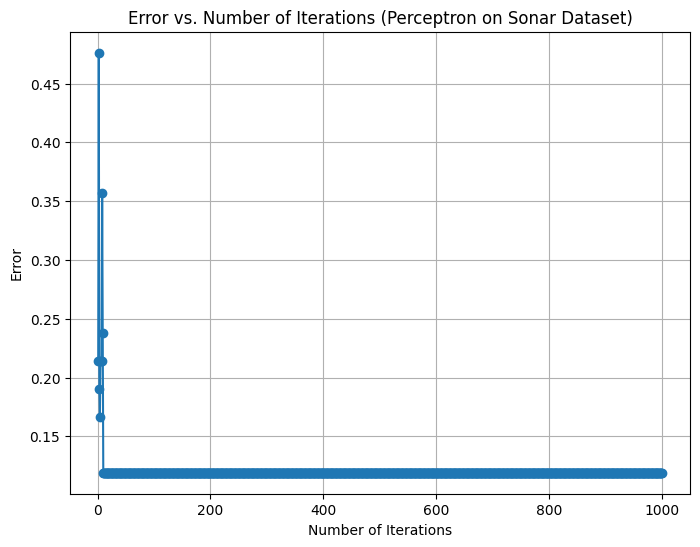

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)
X, y = sonar.data, sonar.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron classifier
perceptron = Perceptron()

# Train the Perceptron classifier
perceptron.fit(X_train, y_train)

# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plotting error
max_iterations = 1000
errors = []
for i in range(1, max_iterations+1):
    perceptron = Perceptron(max_iter=i)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    errors.append(1 - accuracy)

# Plot the error as a function of the number of iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_iterations+1), errors, marker='o', linestyle='-')
plt.title('Error vs. Number of Iterations (Perceptron on Sonar Dataset)')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid(True)
plt.show()


This code snippet performs the following steps:

Loads the Sonar dataset from sklearn.
Splits the dataset into training and testing sets.
Initializes and trains a Perceptron classifier on the training data.
Predicts on the test set and calculates the accuracy.
Plots the error as a function of the number of iterations for training the Perceptron.
The error plot showcases how the error rate changes with an increasing number of iterations. In a non-linearly separable dataset like Sonar, the perceptron algorithm will not achieve perfect accuracy and might converge to a certain error rate, which is evident from the plotted error.








Queston:2


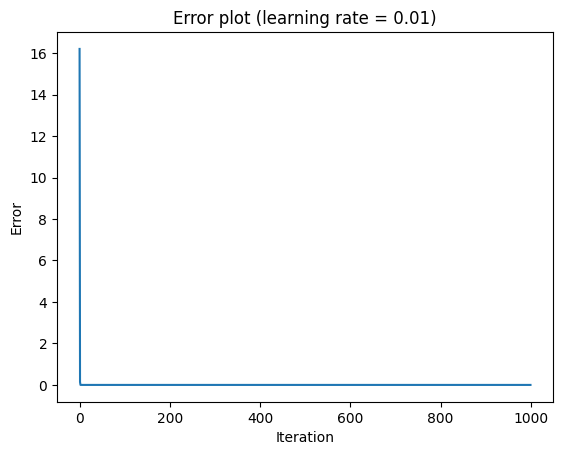

<ipython-input-14-4b57955932fe>:18: RuntimeWarning: overflow encountered in square
  errors.append(np.mean(error**2))
<ipython-input-14-4b57955932fe>:21: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient


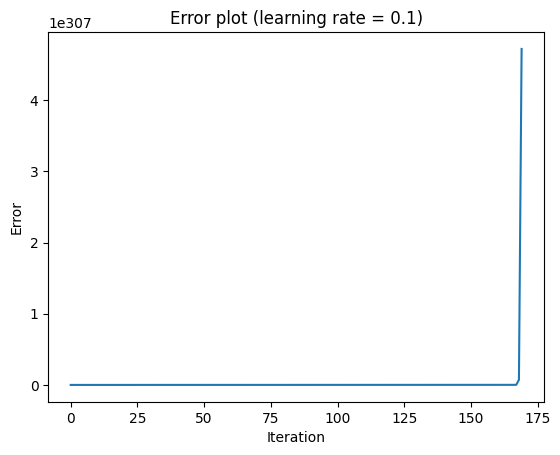

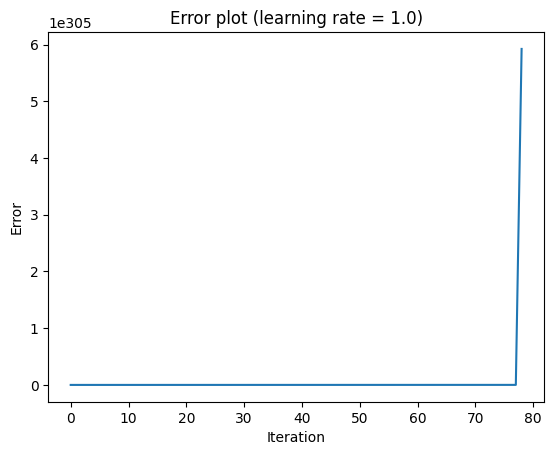

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error(errors, title="Error plot"):
    plt.plot(errors)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.show()

def train_model(X, y, learning_rate, iterations):
    weights = np.random.rand(X.shape[1])
    errors = []

    for _ in range(iterations):
        predictions = np.dot(X, weights)
        error = predictions - y
        errors.append(np.mean(error**2))

        gradient = np.dot(X.T, error)
        weights -= learning_rate * gradient

    return errors

# Generate data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])

# Train the model with different learning rates
learning_rates = [0.01, 0.1, 1.0]
for learning_rate in learning_rates:
    errors = train_model(X, y, learning_rate, 1000)
    plot_error(errors, f"Error plot (learning rate = {learning_rate})")


Question :3

Sure, the perceptron algorithm is a linear classifier and works well only for linearly separable datasets. When applied to datasets that are not linearly separable, the perceptron algorithm will not converge and won't find a solution that perfectly separates the classes.

Let's create a toy dataset that is not linearly separable and then run the perceptron algorithm on it:

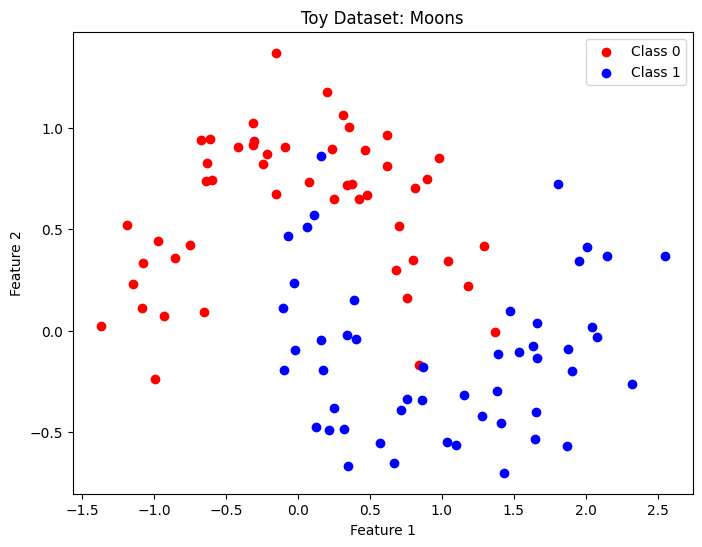

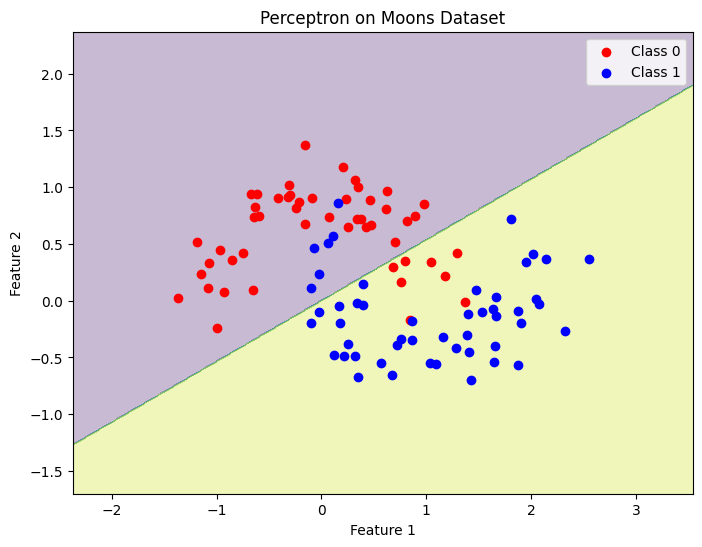

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron

# Create a toy dataset that is not linearly separable (e.g., moons dataset)
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Toy Dataset: Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Apply the Perceptron algorithm
perceptron = Perceptron()
perceptron.fit(X, y)

# Plot the decision boundary of the Perceptron
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Perceptron on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Observations:

In the plot showing the toy dataset (moons), you'll see two interleaving half-moon shapes representing two classes that are not linearly separable.
When the perceptron algorithm is applied and its decision boundary is plotted, you'll notice that it cannot separate the two classes accurately. The perceptron attempts to draw a linear decision boundary, but it cannot correctly classify the non-linearly separable data.
This behavior of the perceptron failing on non-linearly separable data highlights its limitation as a linear classifier. For datasets like these, more complex models or non-linear classifiers such as support vector machines (SVMs) with non-linear kernels or neural networks with hidd.